In [13]:
from miniConvolutional.source.data import source_images

%load_ext autoreload
%autoreload 2

(train_images, train_labels), (test_images, test_labels) = source_images()

# train_generator, idx_labels, valid_generator = source_images(generator=True)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The shape of the training data is: (60000, 28, 28) (60000,)
The shape of the training data is: (10000, 28, 28) (10000,)


In [14]:
X_train = train_images.reshape((60000, 28, 28, 1)) / 255.

X_test = test_images.reshape((10000, 28, 28, 1)) / 255.

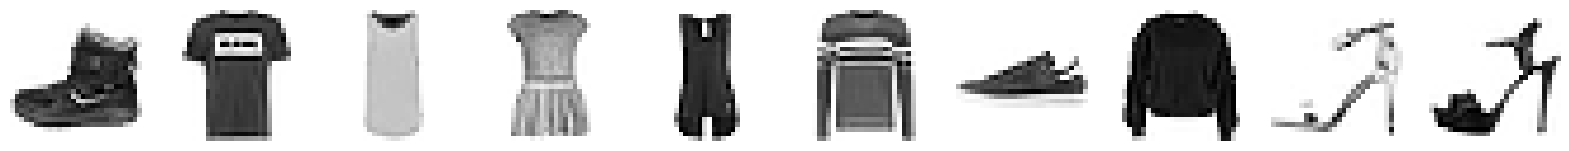

In [15]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(1, 10, figsize=(20, 4))
for i, ax in enumerate(axs):
    ax.axis('off')
    ax.imshow(X_train[i].reshape(28, 28), cmap='Greys')

plt.show()

In [1]:
input = (6000, 32, 32, 1)

In [3]:
input[1:]

(32, 32, 1)

In [17]:
from miniConvolutional.model.encoder import build_encoder
from miniConvolutional.model.decoder import build_decoder
from miniConvolutional.model.autoencoder import build_autoencoder, compile_autoencoder

latent_dim = 10

encoder = build_encoder(latent_dim)

decoder = build_decoder(latent_dim)

autoencoder = build_autoencoder(encoder, decoder)

print(encoder.summary())

print(decoder.summary())

print(autoencoder.summary())

compile_autoencoder(autoencoder)

autoencoder.fit(X_train, X_train, epochs=20, batch_size=32)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 8)         40        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 32)          2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 32)         0

2022-10-24 17:13:35.439551: E tensorflow/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-10-24 17:13:35.439604: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (celcius): /proc/driver/nvidia/version does not exist
2022-10-24 17:13:35.439963: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


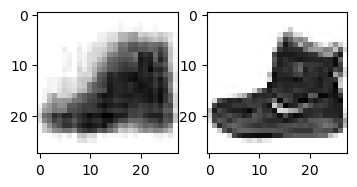

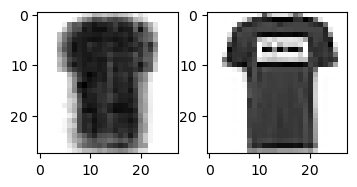

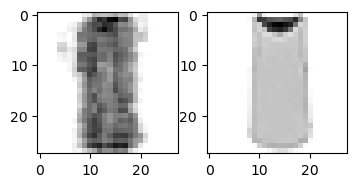

In [25]:
prediction = autoencoder.predict(X_train, verbose=0, batch_size=100)  # you can now display an image to see it is reconstructed well

for i in range(3):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
    ax1.imshow(prediction[i].reshape(28, 28), cmap='Greys')
    ax2.imshow(X_train[i].reshape(28, 28), cmap='Greys')
    plt.show()

In [24]:
X_encoded = encoder.predict(X_train, verbose=1)

1875/1875 [==============================] - 8s 4ms/step


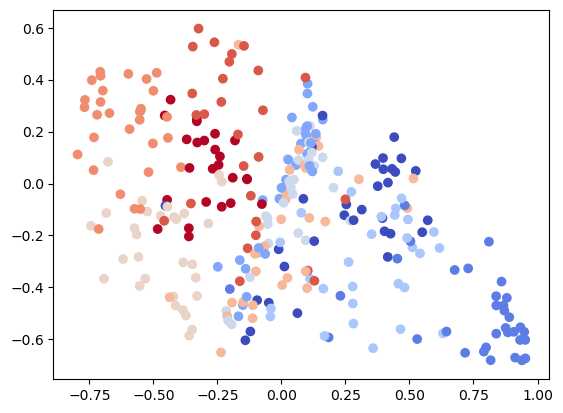

In [28]:
import seaborn as sns

X_encoded = encoder.predict(X_train, verbose=1)

plt.scatter(x=X_encoded[:300, 0],
            y=X_encoded[:300, 1],
            c=train_labels[:300],
            cmap='coolwarm')


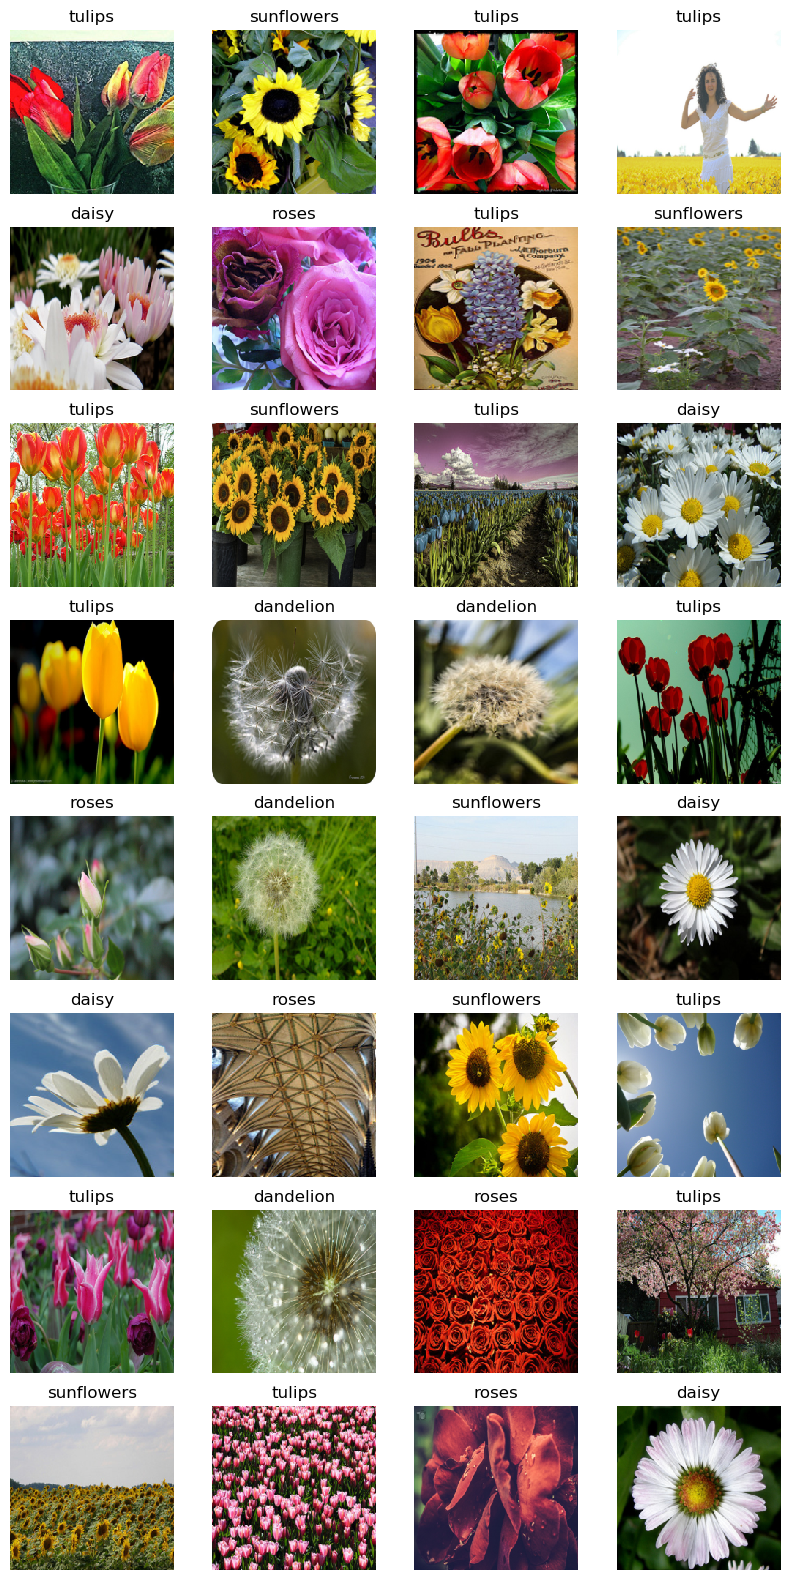

In [10]:
from miniConvolutional.utils.plotter import plot

plot(train_generator, idx_labels)